In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("Display.max_columns",None)
pd.set_option("Display.max_rows",None)

In [2]:
# load dataset
data=pd.read_csv(r"C:\Users\Dell\Downloads\Iris Flower - Iris.csv")

In [3]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# check the shape
data.shape

(150, 6)

In [5]:
# check the null value
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# check the duplicates
data.duplicated().sum()

0

In [7]:
# check the columns
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# check the five point summary
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.describe(include=[object])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [10]:
# remove the id column which is not useful
data=data.drop(columns=['Id'])

In [11]:
data.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


In [12]:
# check the value of target variable
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Performing EDA

# Uni-variate Analysis

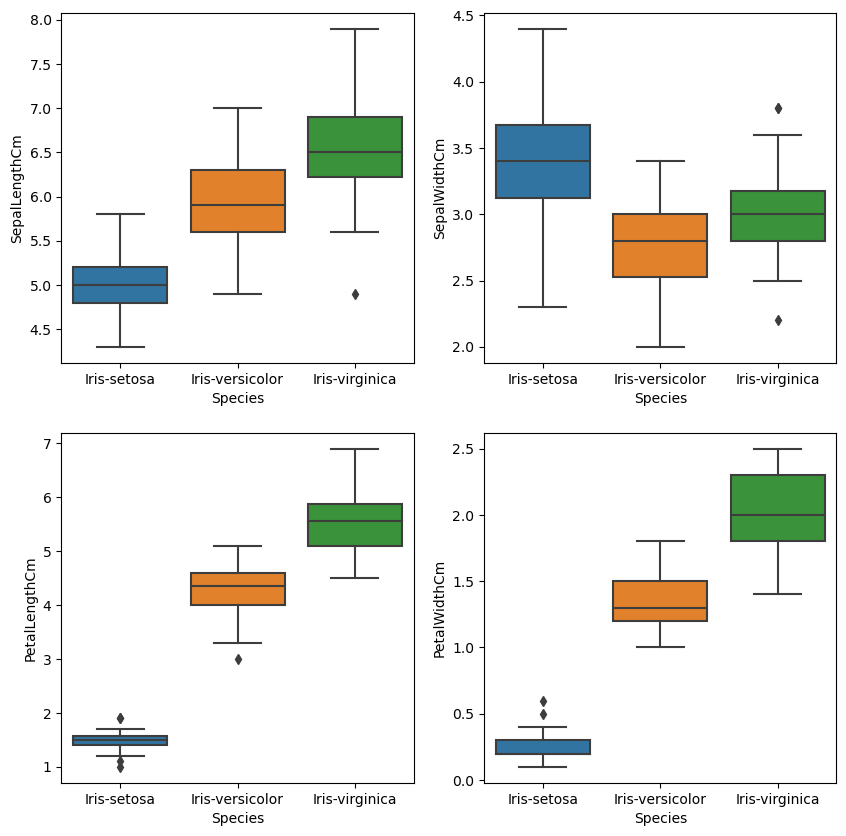

In [14]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(x= data.Species,y=data.SepalLengthCm)
plt.subplot(2,2,2)
sns.boxplot(x= data.Species,y=data.SepalWidthCm)
plt.subplot(2,2,3)
sns.boxplot(x= data.Species,y=data.PetalLengthCm)
plt.subplot(2,2,4)
sns.boxplot(x= data.Species,y=data.PetalWidthCm)
plt.show()

<!-- Iris-virginica has higher median sepal,petal length,petal width while iris setosa has high median sepal and lowest median sepal length,patal length and width -->

__Iris-virginica has higher median sepal,petal length,petal width while iris setosa has high median sepal and lowest median sepal length,patal length and width__

__Bi-variate analysis- catagorial- numerical variable__

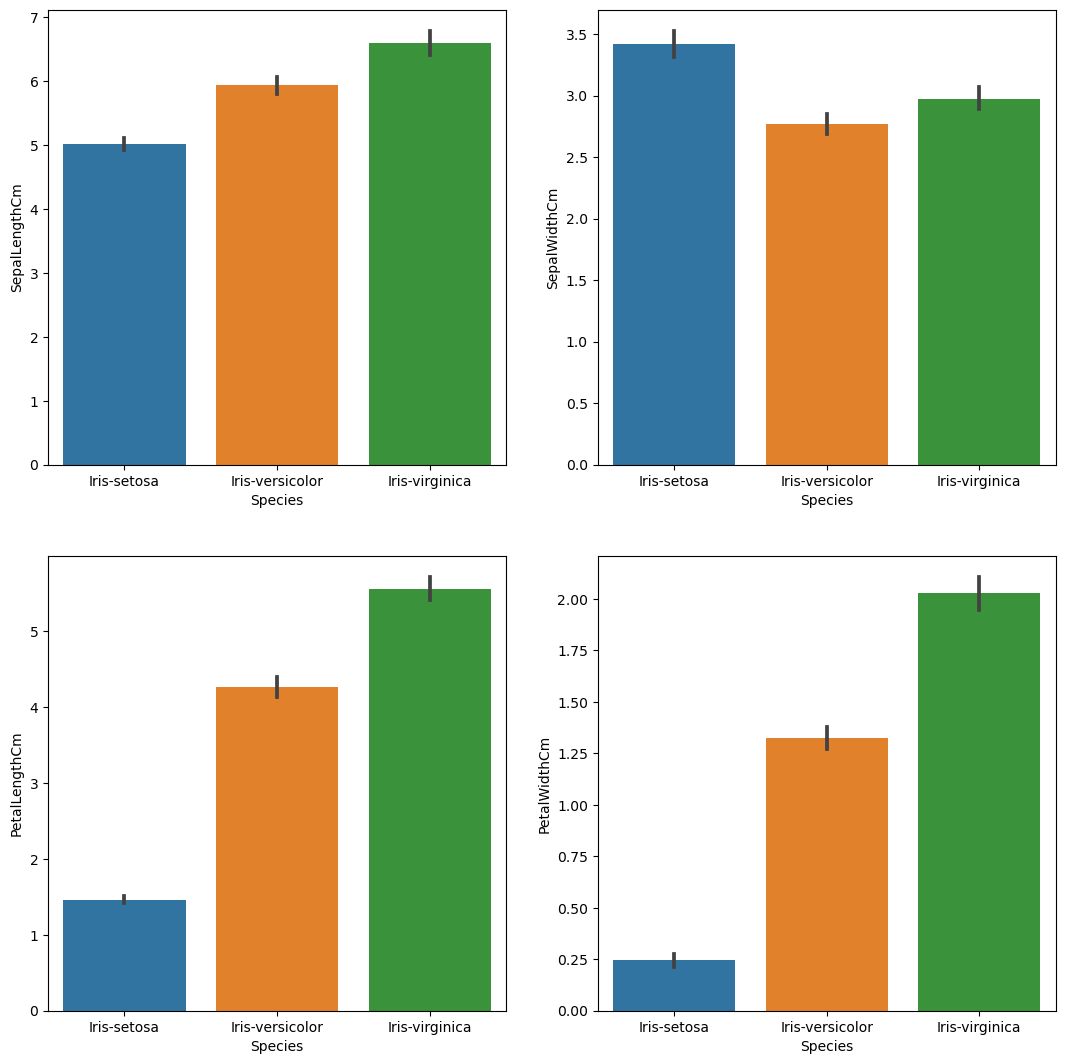

In [15]:
plt.figure(figsize=(13,13))

plt.subplot(2,2,1)
sns.barplot(x=data.Species,y=data.SepalLengthCm)
plt.subplot(2,2,2)
sns.barplot(x=data.Species,y=data.SepalWidthCm)
plt.subplot(2,2,3)
sns.barplot(x=data.Species,y=data.PetalLengthCm)
plt.subplot(2,2,4)
sns.barplot(x=data.Species,y=data.PetalWidthCm)

plt.show()

__Bi-variate Analysis__- Numerical-Numerical variable

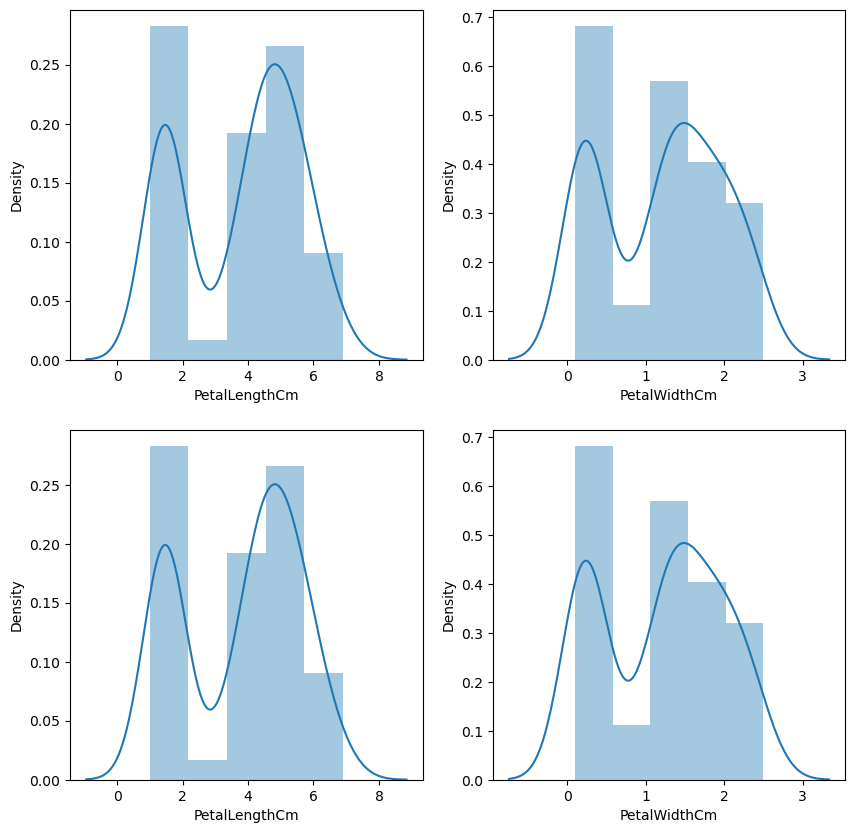

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data['PetalLengthCm'])
plt.subplot(2,2,2)
sns.distplot(data['PetalWidthCm'])
plt.subplot(2,2,3)
sns.distplot(data['PetalLengthCm'])
plt.subplot(2,2,4)
sns.distplot(data['PetalWidthCm'])
plt.show()

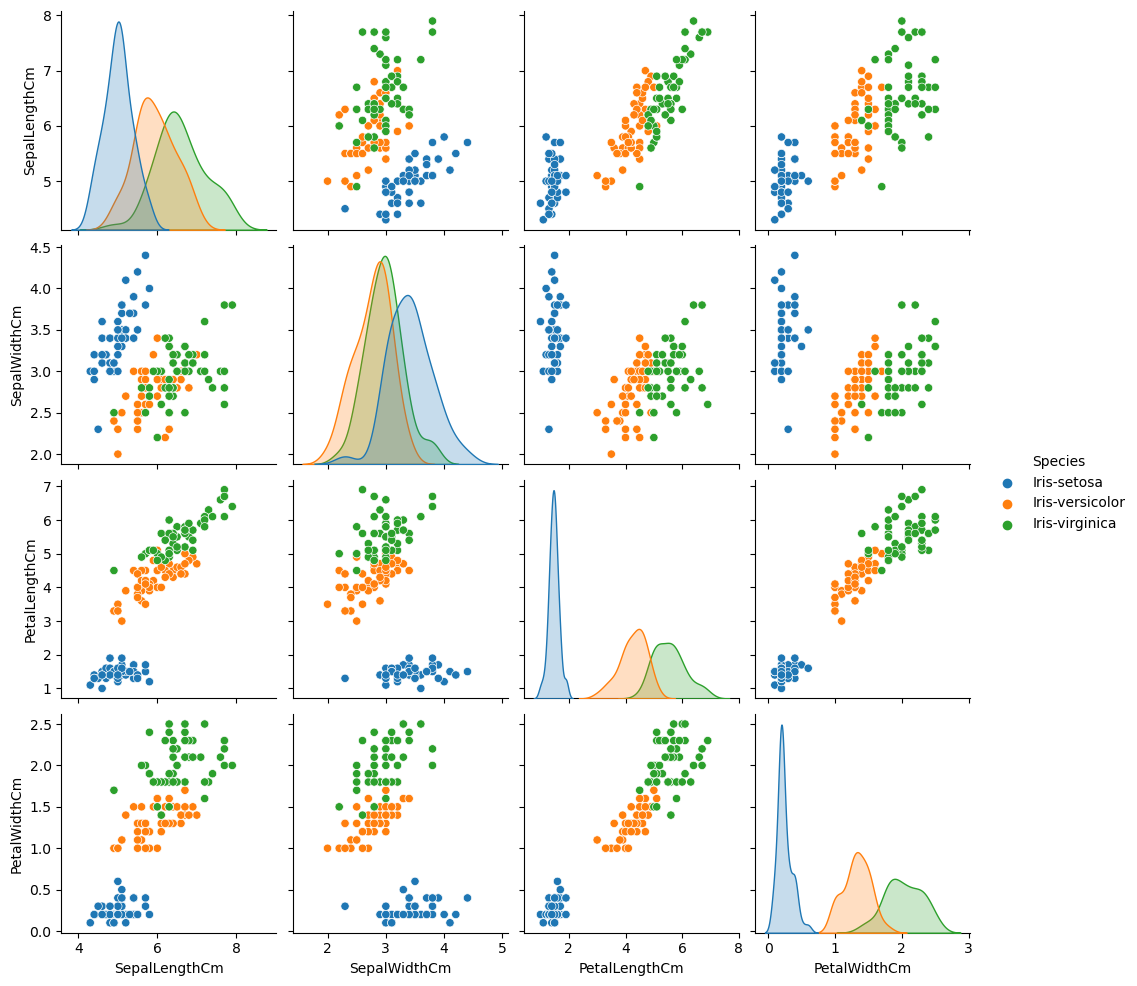

In [17]:
sns.pairplot(data,kind='scatter',hue='Species')
plt.show()

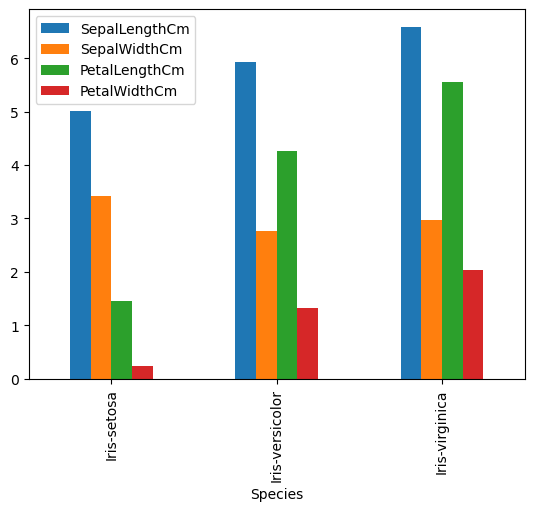

In [18]:
data.groupby('Species').mean().plot.bar()
plt.show()

**Multi-variate analysis**

In [19]:
corr=data.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

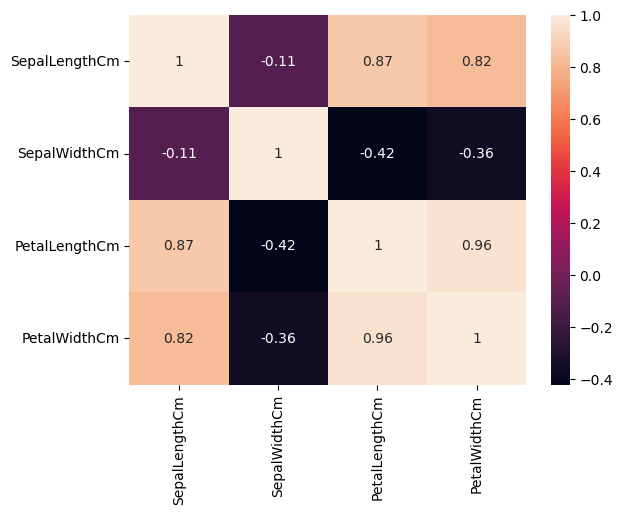

In [20]:
sns.heatmap(corr,annot=True)

In [21]:
# Loading the iris image
import matplotlib.image as img

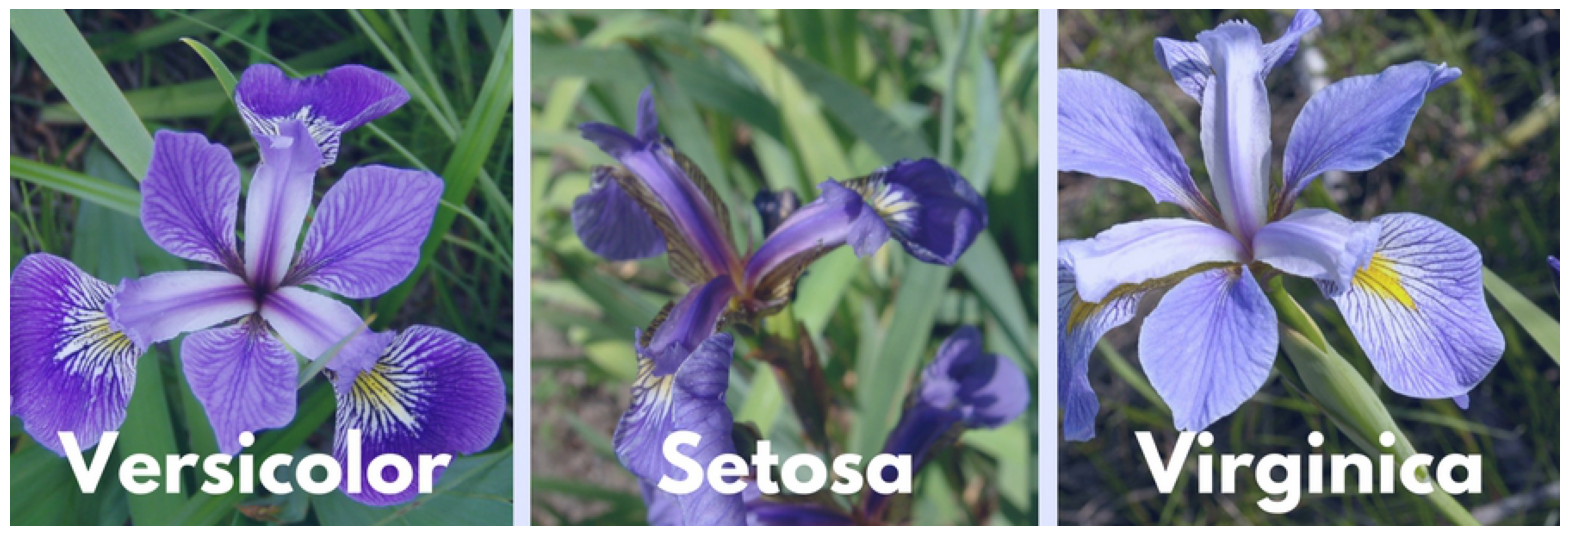

In [22]:
img = img.imread(r'C:\Users\Dell\Downloads\iris_types (1).jpg')
plt.figure(figsize = (20,15))
plt.axis('off')
plt.imshow(img)

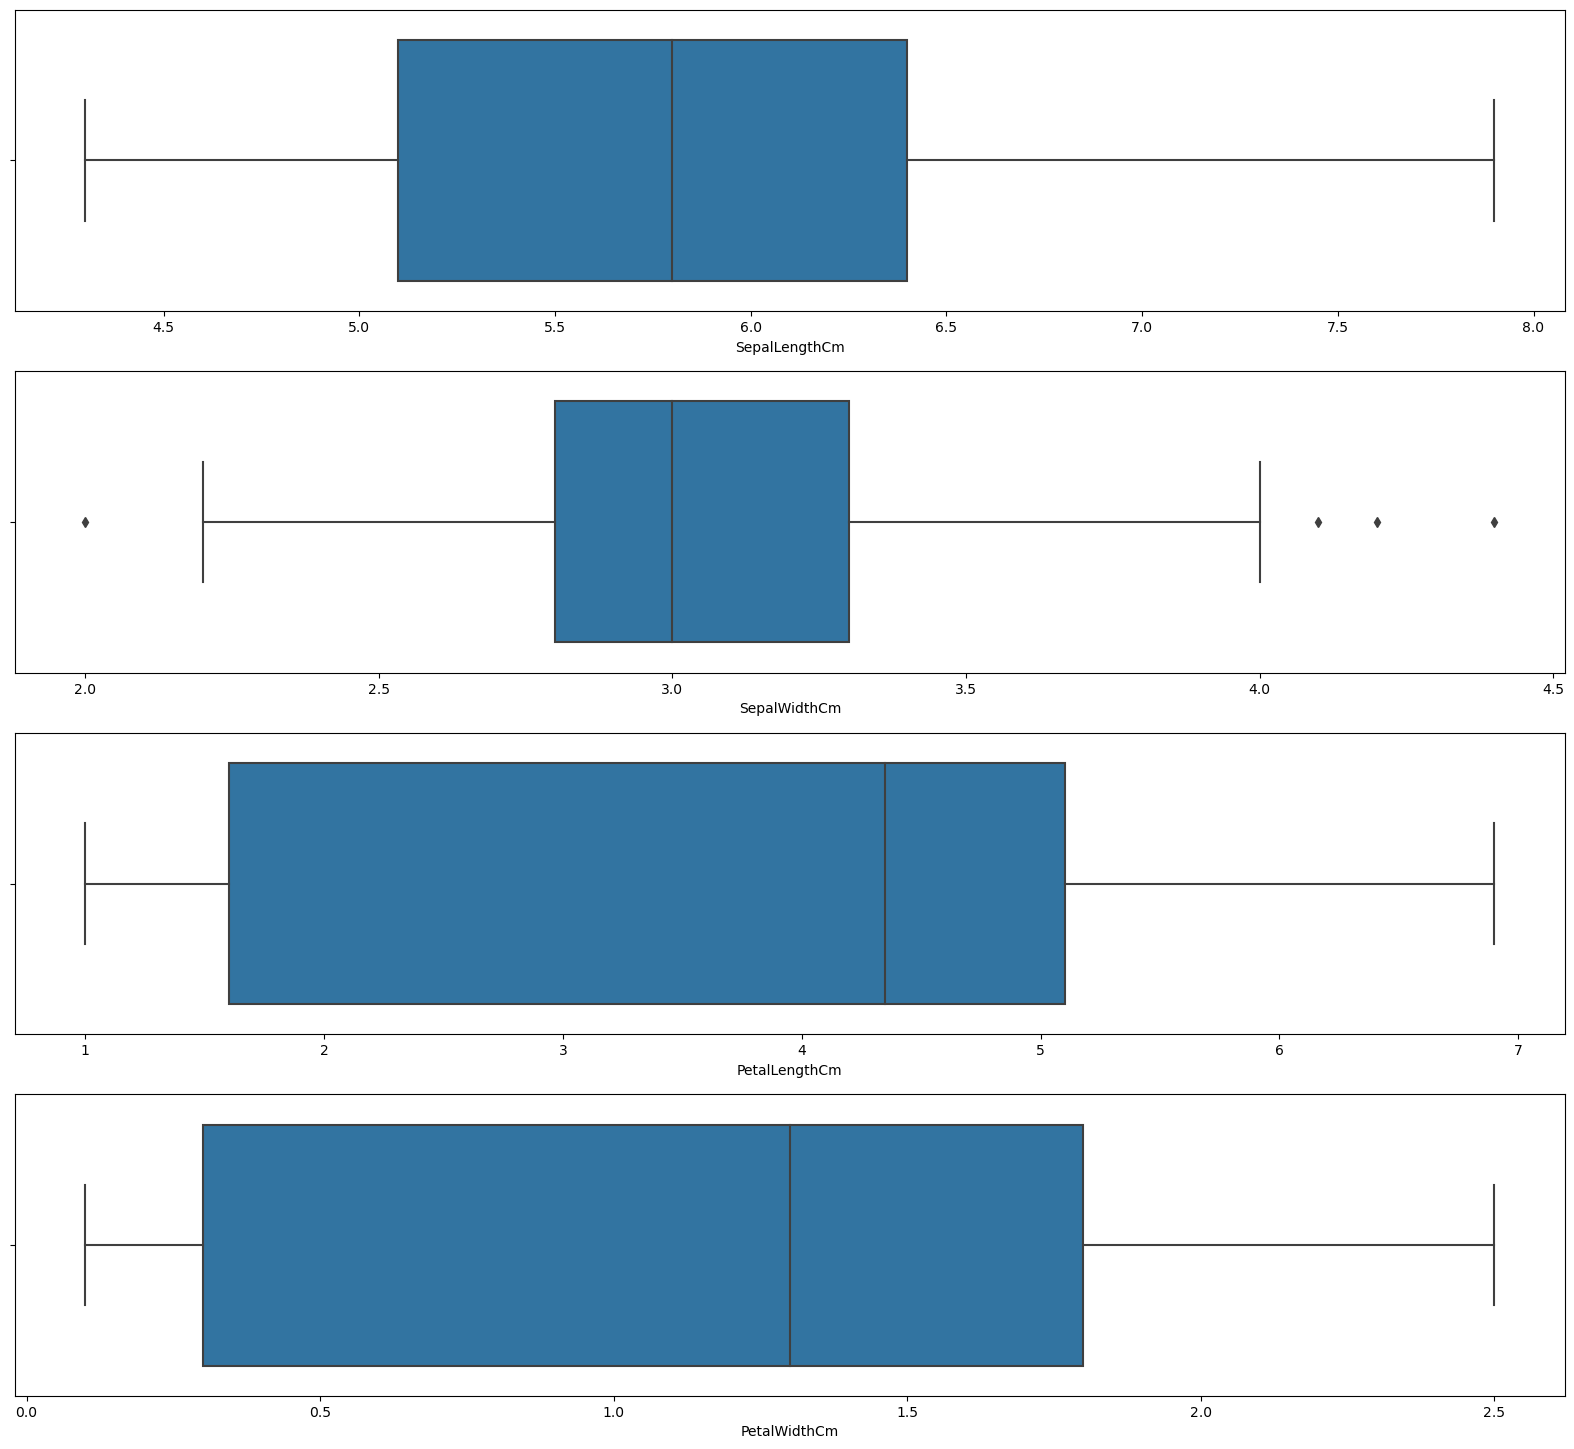

In [23]:
# check the outlier
plt.figure(figsize = (20,18))
for i, cols in enumerate(data.columns[:-1]):
    plt.subplot(4,1,i+1)
    sns.boxplot(x = data[cols])
plt.show()

In [24]:
#  only one has outlier so remove it using clip method
data['SepalWidthCm'] = data['SepalWidthCm'].clip(lower = data['SepalWidthCm'].quantile(0.05), upper = data['SepalWidthCm'].quantile(0.95))

<AxesSubplot:xlabel='SepalWidthCm'>

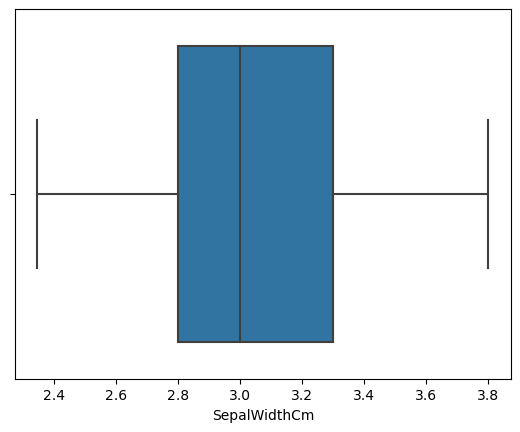

In [25]:
sns.boxplot(data['SepalWidthCm'])

In [26]:
# Looking for imbalnce dataset
imbalance=data['Species'].value_counts()
imbalance

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

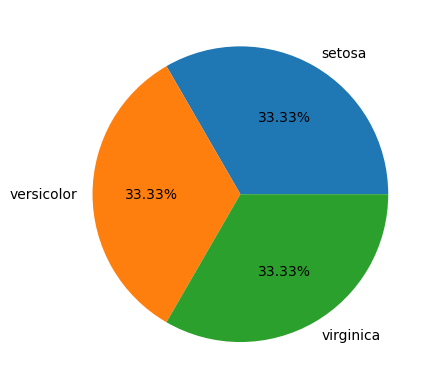

In [27]:
# we use pie plot 
plt.pie(imbalance, data = data, autopct='%.2f%%', labels = ['setosa','versicolor','virginica'])
plt.show()

In [28]:
# scaling the data
from sklearn.preprocessing import StandardScaler

In [29]:
Standard=StandardScaler()

In [30]:
# independent variable
x=data.drop('Species',axis=1)

In [31]:
x.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [32]:
# depedent variable
y=data['Species']

In [33]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [34]:
# spliting the data
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [36]:
x_train.shape,x_test.shape

((120, 4), (30, 4))

In [37]:
y_train.shape,y_test.shape

((120,), (30,))

In [38]:
# now scaling the data
x_train=Standard.fit_transform(x_train)

In [39]:
x_train

array([[ 1.89107197, -0.59494165,  1.32384841,  0.91509239],
       [ 0.16162128, -1.73412502,  0.68491609,  0.37415107],
       [-1.44429721,  0.40653824, -1.28996563, -1.38390819],
       [-0.95016844,  1.15764816, -1.40613514, -1.38390819],
       [ 0.16162128, -1.73412502,  0.10406852, -0.30202557],
       [-1.07370063, -1.73412502, -0.30252477, -0.30202557],
       [ 2.50873292,  1.90875808,  1.49810268,  1.05032772],
       [-0.57957187,  1.90875808, -1.23188088, -1.11343754],
       [-0.57957187,  1.90875808, -1.4642199 , -1.11343754],
       [-0.0854431 , -0.84531162,  0.04598377, -0.03155491],
       [-1.07370063, -1.73412502, -0.18635526, -0.30202557],
       [-1.07370063,  0.40653824, -1.52230466, -1.38390819],
       [ 1.14987882,  0.40653824,  1.20767889,  1.4560337 ],
       [ 1.02634662, -0.0942017 ,  0.8010856 ,  1.4560337 ],
       [-0.0854431 , -0.84531162,  0.74300084,  0.91509239],
       [-0.0854431 , -0.59494165,  0.74300084,  1.59126903],
       [ 0.53221786,  0.

In [40]:
x_test=Standard.transform(x_test)

In [41]:
x_test

array([[ 0.53221786, -1.34605156,  0.62683133,  0.37415107],
       [ 1.14987882, -0.0942017 ,  0.97533987,  1.18556304],
       [ 0.65575005, -0.59494165,  1.03342462,  1.32079837],
       [-0.33250748, -0.0942017 ,  0.16215328,  0.10368042],
       [-1.19723282,  0.15616827, -1.34805039, -1.51914352],
       [ 0.16162128, -0.0942017 ,  0.56874657,  0.77985706],
       [ 0.53221786, -1.73412502,  0.33640755,  0.10368042],
       [-1.81489378,  0.40653824, -1.4642199 , -1.38390819],
       [-1.81489378, -0.34457167, -1.40613514, -1.38390819],
       [-0.45603967, -1.09568159,  0.33640755, -0.03155491],
       [ 1.27341101,  0.15616827,  0.74300084,  1.4560337 ],
       [-0.45603967,  1.90875808, -1.40613514, -1.38390819],
       [-0.82663625, -0.84531162,  0.04598377,  0.23891575],
       [ 0.77928224, -0.0942017 ,  0.97533987,  0.77985706],
       [ 2.26166854, -0.0942017 ,  1.32384841,  1.4560337 ],
       [ 0.77928224, -0.0942017 ,  1.14959414,  1.32079837],
       [-0.45603967,  1.

# Model Building

__Logistic Regression__

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
Logistic=LogisticRegression()

In [44]:
Logistic.fit(x_train,y_train)

LogisticRegression()

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
pred=Logistic.predict(x_train)

In [47]:
test_accuracy=accuracy_score(pred,y_train)

In [48]:
test_accuracy

0.9833333333333333

In [49]:
pred=Logistic.predict(x_test)

In [50]:
train_accuracy=accuracy_score(pred,y_test)

In [51]:
train_accuracy

0.9666666666666667

__Random Forest__

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
Random=RandomForestClassifier(random_state=0,n_estimators=10)

In [55]:
Random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
pred=Random.predict(x_test)

In [58]:
pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [59]:
acc=accuracy_score(pred,y_test)

In [60]:
acc

0.9333333333333333

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(confusion_matrix(pred,y_test))

[[13  0  0]
 [ 0  5  1]
 [ 0  1 10]]


In [66]:
from sklearn import tree

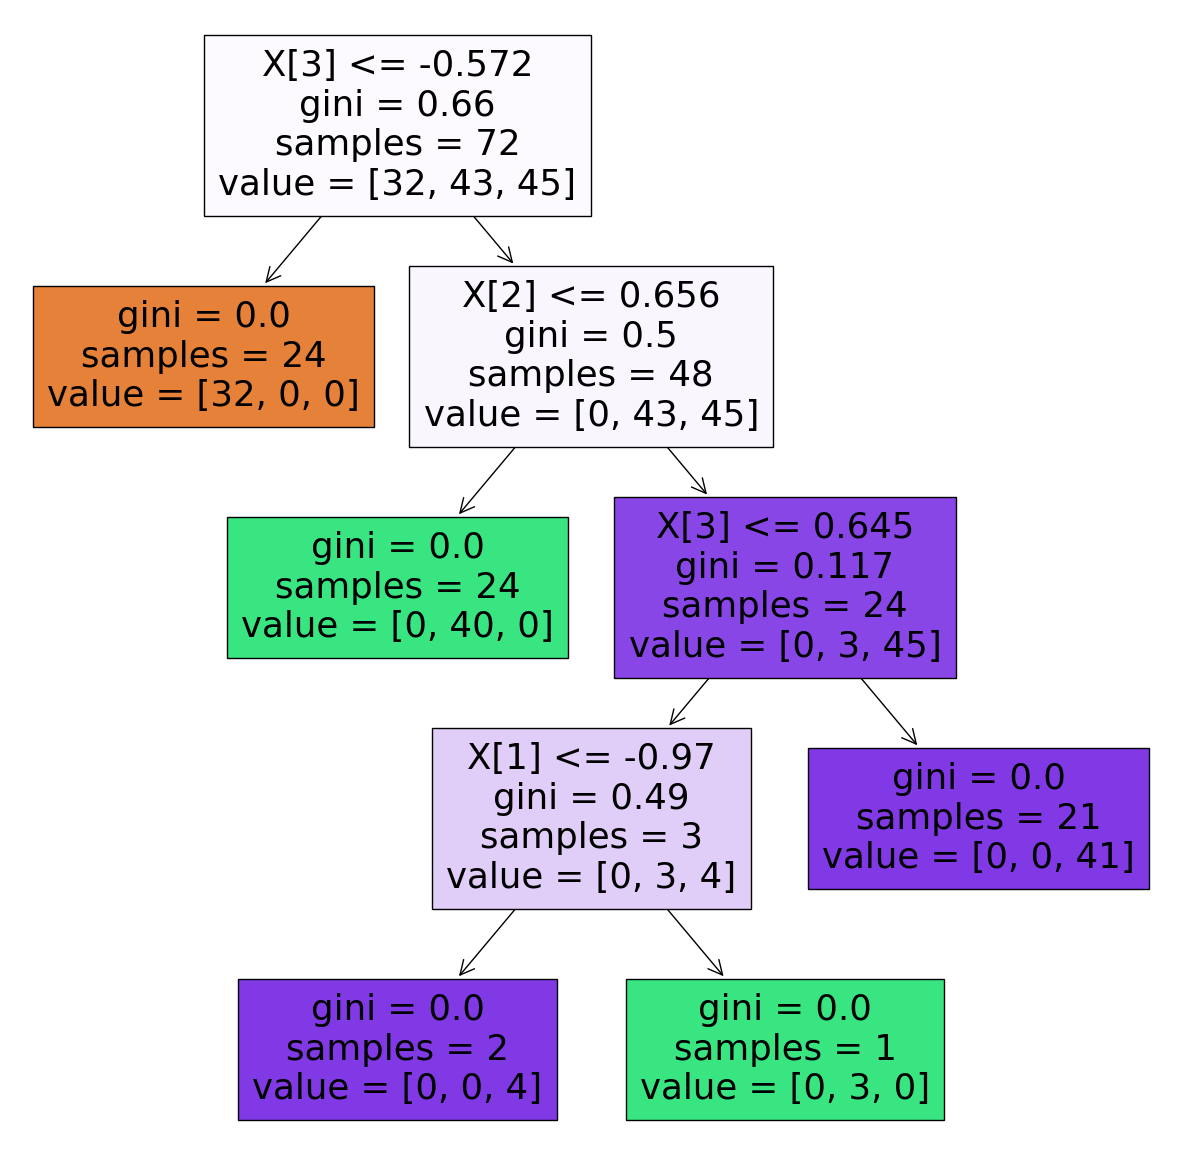

In [71]:
tree_to_visualize = Random.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(15, 15))
tree.plot_tree(tree_to_visualize, filled=True)
plt.show()

In [72]:
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100]}

In [73]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=Random,param_grid=param_grid,cv=5,verbose=True)

In [74]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=0),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=True)

In [75]:
final_model_RF=grid_search.best_estimator_

In [76]:
final_model_RF

RandomForestClassifier(n_estimators=10, random_state=0)

In [77]:
RFC1=RandomForestClassifier(random_state=0,n_estimators=80)

In [78]:
RFC1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=80, random_state=0)

In [79]:
pred1=RFC1.predict(x_test)

In [80]:
pred1

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [81]:
acc1=accuracy_score(pred1,y_test)

In [82]:
acc1

0.9333333333333333

In [83]:
RFC2 = RandomForestClassifier(random_state=0, n_estimators = 60)

In [87]:
RFC2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=60, random_state=0)

In [88]:
pred2=RFC2.predict(x_test)

In [89]:
pred2

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [90]:
acc2=accuracy_score(pred2,y_test)

In [91]:
acc2

0.9333333333333333

# Conclusion

Thecomprehensive analysis of the Iris dataset, including data exploration, visualization, and the building and evaluation of classification models. It also demonstrates good practices for data preprocessing and model evaluation.
1-used a machine learning algorithm to classify iris flower into three species: Iris setosa,Iris versicolor, and Iris virginica.
2-Trained on  a dataset of historical Iris flower data,including information about the flowers' sepal length ,sepal width,petal length, and petal width.
3-used a variety of machine learning algorithm ,including logistic regression and Random Forest.
4-Achieved an accuracy of over 90 % in classify iris flower